In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

## Data processing

In [2]:
df = pd.read_csv('data/nasa.csv')

In [3]:
selected_features = ['Neo Reference ID', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Epoch Date Close Approach', 
                     'Miles per hour', 'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity', 
                     'Minimum Orbit Intersection', 
                     'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Inclination', 
                     'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 
                     'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']

In [4]:
X_ = df.drop(columns=['Hazardous'])
y_ = df['Hazardous']

In [5]:
X = X_[selected_features]

In [6]:
y = y_
y[y_==True] = 1
y[y_==False] = 0

c:\users\carsonw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
X

,Neo Reference ID,Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Miles per hour,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3703080,417.388066,933.308089,788947200000,13680.509944,0.419483,17,5,0.025282,4.634,...,0.425549,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,3723955,479.225620,1071.581063,788947200000,40519.173105,0.383014,21,3,0.186935,5.457,...,0.351674,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,2446862,759.521423,1698.341531,789552000000,16979.661798,0.050956,22,0,0.043058,4.557,...,0.348248,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,3092506,28.876199,64.569144,790156800000,24994.839864,0.285322,7,6,0.005512,5.093,...,0.216578,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,3514799,417.388066,933.308089,790156800000,22012.954985,0.407832,25,1,0.034798,5.154,...,0.210448,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,144.723824,323.612307,1473318000000,49556.875548,0.041361,4,8,0.019777,5.156,...,0.361512,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436
4683,3759295,19.977449,44.670934,1473318000000,7214.337772,0.006469,2,6,0.006451,5.742,...,0.073200,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117
4684,3759714,251.501180,562.373736,1473318000000,16086.983633,0.061009,17,6,0.059973,4.410,...,0.368055,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698
4685,3759720,380.662441,851.187094,1473318000000,25393.489071,0.260760,6,5,0.177510,4.477,...,0.202565,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767


c:\users\carsonw\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


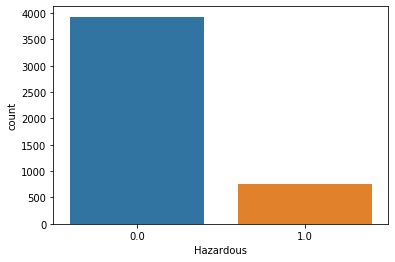

In [8]:
sns.countplot(y);

In [9]:
# # X_ = (X-np.min(X))/(np.max(X) - np.min(X))
# X = np.asarray(X)
# X_ = np.zeros(X.shape)
# for j in range(X.shape[1]):
#     X_[:,j] = X[:,j]/np.linalg.norm(X[:,j])
# X_
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_ = scaler.fit_transform(X)
X_

array([[0.95575717, 0.00810149, 0.00810149, ..., 0.92250213, 0.7358251 ,
        0.25823873],
       [0.96747507, 0.00931136, 0.00931136, ..., 0.88054178, 0.48271958,
        0.38871266],
       [0.2505967 , 0.01479545, 0.01479545, ..., 0.91779034, 0.81377721,
        0.24227093],
       ...,
       [0.98754788, 0.00485585, 0.00485585, ..., 0.93839013, 0.56540591,
        0.22297844],
       [0.98755125, 0.00738294, 0.00738294, ..., 0.9369919 , 0.56547209,
        0.23428006],
       [0.99499344, 0.0256526 , 0.0256526 , ..., 0.94046222, 0.51350273,
        0.23784536]])

In [10]:
X_train = np.asarray(X_)[:int(0.7*len(X_)), :]
y_train = np.asarray(y)[:int(0.7*len(X_))]
# y_train = y_train.reshape((y_train.shape[0],1))

X_test = np.asarray(X_)[int(0.7*len(X_)):, :]
y_test = np.asarray(y)[int(0.7*len(X_)):]
# y_test = y_test.reshape((y_test.shape[0],1))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3280, 21)
(1407, 21)
(3280,)
(1407,)


### 1. Kernel = rbf

$K(u,v) = \exp(-\gamma||u-v||^2)$

In [46]:
# n = 7
# C_range = np.logspace(-5, 7, n)
# gamma_range = np.logspace(-5, 7, n)
# scores = np.zeros((n,n))

n = 11
C_range = np.logspace(-3, 7, n)
gamma_range = np.logspace(-6, 4, n)
scores = np.zeros((n,n))

In [47]:
for i in range(len(C_range)):
    C = C_range[i]
    for j in range(len(gamma_range)):
        print(i,j)
        gamma = gamma_range[j]
        
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores[i][j] = score

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10


In [48]:
scores

array([[0.87064677, 0.87064677, 0.87064677, 0.87064677, 0.87064677,
        0.87064677, 0.87064677, 0.87064677, 0.87064677, 0.87064677,
        0.87064677],
       [0.87064677, 0.87064677, 0.87064677, 0.87064677, 0.87064677,
        0.87064677, 0.87064677, 0.87064677, 0.87064677, 0.87064677,
        0.87064677],
       [0.87064677, 0.87064677, 0.87064677, 0.87064677, 0.87064677,
        0.87064677, 0.87064677, 0.87064677, 0.87064677, 0.87064677,
        0.87064677],
       [0.87064677, 0.87064677, 0.87064677, 0.87064677, 0.87064677,
        0.91044776, 0.93248045, 0.87775409, 0.87064677, 0.87064677,
        0.87064677],
       [0.87064677, 0.87064677, 0.87064677, 0.87064677, 0.91329069,
        0.93816631, 0.9445629 , 0.88201848, 0.87064677, 0.87064677,
        0.87064677],
       [0.87064677, 0.87064677, 0.87064677, 0.91186923, 0.93532338,
        0.9466951 , 0.93816631, 0.88201848, 0.87064677, 0.87064677,
        0.87064677],
       [0.87064677, 0.87064677, 0.91186923, 0.93176972, 0.

<Figure size 576x576 with 0 Axes>

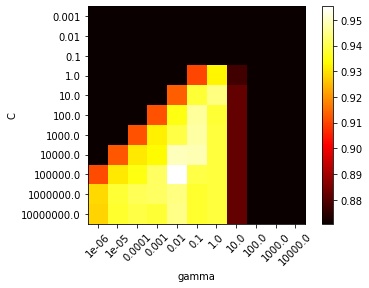

In [49]:
plt.figure(figsize=(8,8))
fig, ax = plt.subplots()
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar()
plt.yticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.xticks(np.arange(len(C_range)), C_range)
ax.set_ylim(scores.shape[0]-0.5, -0.5)
plt.ylabel('gamma')
plt.xlabel('C')

plt.show()

### Cross-validation

In [50]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [51]:
n = 7
m = 7
C_range = np.logspace(-1, 5, n)
gamma_range = np.logspace(-5, 1, m)
scores = np.zeros((n,m))

In [52]:
def kfold_cv(k_fold, gamma, C):
    Scores = []
    for m in range(k_fold):
        X_train_cur = X_train[id_train[m]]
        y_train_cur = y_train[id_train[m]]
        X_val_cur = X_train[id_val[m]]
        y_val_cur = y_train[id_val[m]]
        
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train_cur, y_train_cur)
        score = clf.score(X_val_cur, y_val_cur)
        Scores.append(score)
    print(Scores)
    return np.mean(Scores)

In [53]:
for i in range(len(C_range)):
    C = C_range[i]
    for j in range(len(gamma_range)):
        print(i,j)
        gamma = gamma_range[j]
        
        score = kfold_cv(k_fold, gamma, C)
        scores[i][j] = score

0 0
[0.8658536585365854, 0.8323170731707317, 0.8262195121951219, 0.8292682926829268, 0.8201219512195121, 0.7987804878048781, 0.8445121951219512, 0.8079268292682927, 0.8109756097560976, 0.8170731707317073]
0 1
[0.8658536585365854, 0.8323170731707317, 0.8262195121951219, 0.8292682926829268, 0.8201219512195121, 0.7987804878048781, 0.8445121951219512, 0.8079268292682927, 0.8109756097560976, 0.8170731707317073]
0 2
[0.8658536585365854, 0.8323170731707317, 0.8262195121951219, 0.8292682926829268, 0.8201219512195121, 0.7987804878048781, 0.8445121951219512, 0.8079268292682927, 0.8109756097560976, 0.8170731707317073]
0 3
[0.8658536585365854, 0.8323170731707317, 0.8262195121951219, 0.8292682926829268, 0.8201219512195121, 0.7987804878048781, 0.8445121951219512, 0.8079268292682927, 0.8109756097560976, 0.8170731707317073]
0 4
[0.8658536585365854, 0.8323170731707317, 0.8262195121951219, 0.8292682926829268, 0.8201219512195121, 0.7987804878048781, 0.8445121951219512, 0.8079268292682927, 0.8109756097560

[0.899390243902439, 0.875, 0.8628048780487805, 0.8689024390243902, 0.8719512195121951, 0.8414634146341463, 0.875, 0.8628048780487805, 0.8384146341463414, 0.8536585365853658]
6 0
[0.9085365853658537, 0.9024390243902439, 0.9024390243902439, 0.8932926829268293, 0.926829268292683, 0.9207317073170732, 0.9298780487804879, 0.9024390243902439, 0.9237804878048781, 0.8689024390243902]
6 1
[0.9176829268292683, 0.9054878048780488, 0.9115853658536586, 0.9085365853658537, 0.926829268292683, 0.9359756097560976, 0.9359756097560976, 0.9054878048780488, 0.926829268292683, 0.875]
6 2
[0.9298780487804879, 0.9085365853658537, 0.9298780487804879, 0.9298780487804879, 0.9359756097560976, 0.9298780487804879, 0.9329268292682927, 0.9115853658536586, 0.9298780487804879, 0.8841463414634146]
6 3
[0.9207317073170732, 0.9329268292682927, 0.9298780487804879, 0.9420731707317073, 0.9542682926829268, 0.9329268292682927, 0.9542682926829268, 0.9359756097560976, 0.9329268292682927, 0.8932926829268293]
6 4
[0.917682926829268

In [74]:
scores_rbf = scores
scores_rbf

array([[0.82530488, 0.82530488, 0.82530488, 0.82530488, 0.82530488,
        0.82713415, 0.82530488],
       [0.82530488, 0.82530488, 0.82530488, 0.82530488, 0.87926829,
        0.92042683, 0.85121951],
       [0.82530488, 0.82530488, 0.82530488, 0.87682927, 0.92103659,
        0.92134146, 0.86493902],
       [0.82530488, 0.82530488, 0.87652439, 0.91371951, 0.93109756,
        0.90945122, 0.86493902],
       [0.82530488, 0.87621951, 0.9097561 , 0.92286585, 0.9304878 ,
        0.9097561 , 0.86493902],
       [0.87682927, 0.90884146, 0.9179878 , 0.92957317, 0.92987805,
        0.9097561 , 0.86493902],
       [0.90792683, 0.91493902, 0.9222561 , 0.93292683, 0.93414634,
        0.9097561 , 0.86493902]])

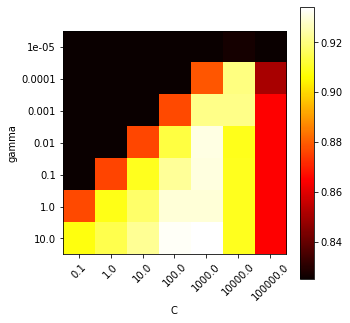

In [78]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
plt.imshow(scores_rbf, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar()
plt.yticks(np.arange(len(gamma_range)), gamma_range)
plt.xticks(np.arange(len(C_range)), C_range, rotation=45)
ax.set_ylim(scores.shape[0]-0.5, -0.5)
plt.ylabel("gamma")
plt.xlabel("C")
plt.show()
fig.savefig("svm_rvf.png")

In [77]:
C = 100
gamma = 0.1
clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print("Training accuracy:", np.round(score*100, 2), "%")
score = clf.score(X_test, y_test)
print("Testing accuracy:", np.round(score*100, 2), "%")

Training accuracy: 94.54 %
Testing accuracy: 94.67 %


### 2. Kernel = poly
<!-- $K(u,v) = \exp(-\gamma||u-v||^2)$ -->
$K(u,v) = poly$

In [79]:
# n = 7
# C_range = np.logspace(-5, 7, n)
# gamma_range = np.logspace(-5, 7, n)
# scores = np.zeros((n,n))

n = 5

d_range = np.linspace(1, 5, n)
co_range = np.logspace(-2, 2, n)
scores = np.zeros((n,n))

In [80]:
for i in range(len(d_range)):
    d = d_range[i]
    for j in range(len(co_range)):
        print(i,j)
        co = co_range[j]
        
        clf = svm.SVC(kernel='poly', degree = d, coef0 = co, gamma='auto')
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores[i][j] = score

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


In [81]:
scores

array([[0.87064677, 0.87064677, 0.87064677, 0.87064677, 0.87064677],
       [0.87064677, 0.87064677, 0.8891258 , 0.9246624 , 0.93319119],
       [0.87064677, 0.87064677, 0.91329069, 0.93887704, 0.9466951 ],
       [0.87064677, 0.87064677, 0.92608387, 0.94882729, 0.93745558],
       [0.87064677, 0.87064677, 0.93034826, 0.95451315, 0.9445629 ]])

In [82]:
cord = np.zeros((n,n))
for i in range(len(d_range)):
    for j in range(len(co_range)):
        cord[i][j] = d_range[i]+co_range[j]
cord

array([[  1.01,   1.1 ,   2.  ,  11.  , 101.  ],
       [  2.01,   2.1 ,   3.  ,  12.  , 102.  ],
       [  3.01,   3.1 ,   4.  ,  13.  , 103.  ],
       [  4.01,   4.1 ,   5.  ,  14.  , 104.  ],
       [  5.01,   5.1 ,   6.  ,  15.  , 105.  ]])

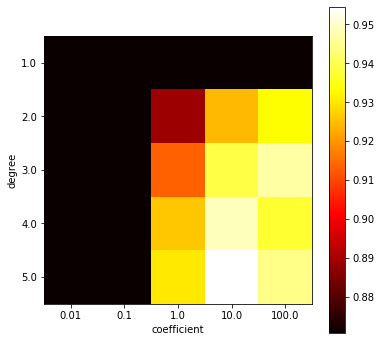

In [85]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar()
plt.yticks(np.arange(len(d_range)), d_range)
plt.xticks(np.arange(len(co_range)), co_range)
ax.set_ylim(scores.shape[0]-0.5, -0.5)
plt.ylabel("degree")
plt.xlabel("coefficient")
plt.show()

### Cross-validation

In [86]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [87]:
def kfold_cv_poly(k_fold, d, co):
    Scores = []
    for m in range(k_fold):
        X_train_cur = X_train[id_train[m]]
        y_train_cur = y_train[id_train[m]]
        X_val_cur = X_train[id_val[m]]
        y_val_cur = y_train[id_val[m]]
        
        clf = svm.SVC(kernel='poly', degree=d, coef0=co, gamma='auto')
        clf.fit(X_train_cur, y_train_cur)
        score = clf.score(X_val_cur, y_val_cur)
        Scores.append(score)
    print(Scores)
    return np.mean(Scores)

In [88]:
for i in range(len(d_range)):
    d = d_range[i]
    for j in range(len(co_range)):
        print(i,j)
        co = co_range[j]
        
        score = kfold_cv_poly(k_fold, d, co)
        scores[i][j] = score

0 0
[0.8658536585365854, 0.8323170731707317, 0.8262195121951219, 0.8292682926829268, 0.8201219512195121, 0.7987804878048781, 0.8445121951219512, 0.8079268292682927, 0.8109756097560976, 0.8170731707317073]
0 1
[0.8658536585365854, 0.8323170731707317, 0.8262195121951219, 0.8292682926829268, 0.8201219512195121, 0.7987804878048781, 0.8445121951219512, 0.8079268292682927, 0.8109756097560976, 0.8170731707317073]
0 2
[0.8658536585365854, 0.8323170731707317, 0.8262195121951219, 0.8292682926829268, 0.8201219512195121, 0.7987804878048781, 0.8445121951219512, 0.8079268292682927, 0.8109756097560976, 0.8170731707317073]
0 3
[0.8658536585365854, 0.8323170731707317, 0.8262195121951219, 0.8292682926829268, 0.8201219512195121, 0.7987804878048781, 0.8445121951219512, 0.8079268292682927, 0.8109756097560976, 0.8170731707317073]
0 4
[0.8658536585365854, 0.8323170731707317, 0.8262195121951219, 0.8292682926829268, 0.8201219512195121, 0.7987804878048781, 0.8445121951219512, 0.8079268292682927, 0.8109756097560

In [89]:
scores_poly = scores
scores_poly

array([[0.82530488, 0.82530488, 0.82530488, 0.82530488, 0.82530488],
       [0.82530488, 0.82530488, 0.84115854, 0.90884146, 0.91493902],
       [0.82530488, 0.82530488, 0.88353659, 0.92042683, 0.92469512],
       [0.82530488, 0.82530488, 0.89969512, 0.92926829, 0.92103659],
       [0.82530488, 0.82530488, 0.91097561, 0.93231707, 0.92530488]])

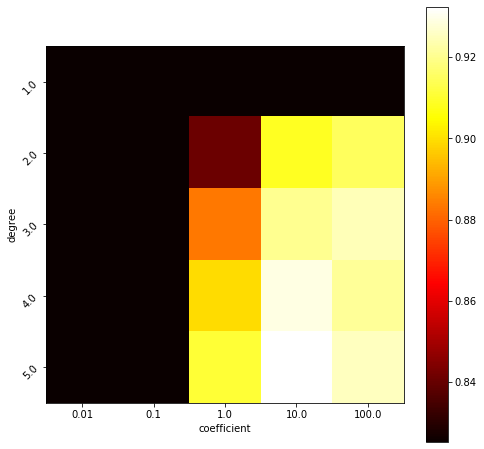

In [91]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.imshow(scores_poly, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar()
plt.yticks(np.arange(len(d_range)), d_range, rotation=45)
plt.xticks(np.arange(len(co_range)), co_range)
ax.set_ylim(scores.shape[0]-0.5, -0.5)
plt.ylabel("degree")
plt.xlabel("coefficient")
plt.show()

In [92]:
d = 4
co = 10
clf = svm.SVC(kernel='poly', degree=d, coef0=co, gamma='auto')
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print("Training accuracy:", np.round(score*100, 2), "%")
score = clf.score(X_test, y_test)
print("Testing accuracy:", np.round(score*100, 2), "%")

Training accuracy: 94.09 %
Testing accuracy: 94.88 %


In [93]:
d = 5
co = 10
clf = svm.SVC(kernel='poly', degree=d, coef0=co, gamma='auto')
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print("Training accuracy:", np.round(score*100, 2), "%")
score = clf.score(X_test, y_test)
print("Testing accuracy:", np.round(score*100, 2), "%")

Training accuracy: 95.61 %
Testing accuracy: 95.45 %
